In [25]:
import pandas as pd
import dateutil
import os

In [26]:
data = pd.read_csv("./data/2february.csv.zip", compression='zip', header=0, sep=',')
data = data.iloc[0::8,:]
data.head()

,pickup_datetime,pickup_latitude,pickup_longitude,trip_distance,passenger_count,dropoff_datetime,dropoff_latitude,dropoff_longitude,fare_amount,tolls_amount,taxes_amount,tip_amount,payment_amount,payment_type
0,2016-02-01 00:00:00,40.72855,-73.98164,0.90,1,2016-02-01 00:06:47,40.73955,-73.98048,6.5,0.00,1.3,2.20,10.00,1
8,2016-02-01 00:00:05,40.77401,-73.87448,9.40,1,2016-02-01 00:18:34,40.80283,-73.96407,26.5,5.54,1.3,0.00,33.34,2
16,2016-02-01 00:00:08,40.75923,-73.99207,8.10,4,2016-02-01 00:32:44,40.85145,-73.94001,28.5,0.00,1.3,5.00,34.80,1
24,2016-02-01 00:00:13,40.72127,-73.99352,2.52,6,2016-02-01 00:10:19,40.75106,-73.98453,10.0,0.00,1.3,2.26,13.56,1
32,2016-02-01 00:00:18,40.64659,-73.79050,18.66,2,2016-02-01 00:27:01,40.72987,-74.00407,52.0,0.00,0.8,10.56,63.36,1


In [27]:
type(data.iloc[0,0])

str

In [28]:
data.shape

(1422757, 14)

In [29]:
import time
start = time.time()

In [30]:
data['pickup_datetime'] = data['pickup_datetime'].apply(dateutil.parser.parse)
data['dropoff_datetime'] = data['dropoff_datetime'].apply(dateutil.parser.parse)
end = time.time()
duration = end -start
duration

312.119158744812

In [31]:
data.shape

(1422757, 14)

In [32]:
data.head()

,pickup_datetime,pickup_latitude,pickup_longitude,trip_distance,passenger_count,dropoff_datetime,dropoff_latitude,dropoff_longitude,fare_amount,tolls_amount,taxes_amount,tip_amount,payment_amount,payment_type
0,2016-02-01 00:00:00,40.72855,-73.98164,0.90,1,2016-02-01 00:06:47,40.73955,-73.98048,6.5,0.00,1.3,2.20,10.00,1
8,2016-02-01 00:00:05,40.77401,-73.87448,9.40,1,2016-02-01 00:18:34,40.80283,-73.96407,26.5,5.54,1.3,0.00,33.34,2
16,2016-02-01 00:00:08,40.75923,-73.99207,8.10,4,2016-02-01 00:32:44,40.85145,-73.94001,28.5,0.00,1.3,5.00,34.80,1
24,2016-02-01 00:00:13,40.72127,-73.99352,2.52,6,2016-02-01 00:10:19,40.75106,-73.98453,10.0,0.00,1.3,2.26,13.56,1
32,2016-02-01 00:00:18,40.64659,-73.79050,18.66,2,2016-02-01 00:27:01,40.72987,-74.00407,52.0,0.00,0.8,10.56,63.36,1


In [33]:
data.reset_index(drop=True, inplace=True)
data.head()

,pickup_datetime,pickup_latitude,pickup_longitude,trip_distance,passenger_count,dropoff_datetime,dropoff_latitude,dropoff_longitude,fare_amount,tolls_amount,taxes_amount,tip_amount,payment_amount,payment_type
0,2016-02-01 00:00:00,40.72855,-73.98164,0.90,1,2016-02-01 00:06:47,40.73955,-73.98048,6.5,0.00,1.3,2.20,10.00,1
1,2016-02-01 00:00:05,40.77401,-73.87448,9.40,1,2016-02-01 00:18:34,40.80283,-73.96407,26.5,5.54,1.3,0.00,33.34,2
2,2016-02-01 00:00:08,40.75923,-73.99207,8.10,4,2016-02-01 00:32:44,40.85145,-73.94001,28.5,0.00,1.3,5.00,34.80,1
3,2016-02-01 00:00:13,40.72127,-73.99352,2.52,6,2016-02-01 00:10:19,40.75106,-73.98453,10.0,0.00,1.3,2.26,13.56,1
4,2016-02-01 00:00:18,40.64659,-73.79050,18.66,2,2016-02-01 00:27:01,40.72987,-74.00407,52.0,0.00,0.8,10.56,63.36,1


In [34]:
data.iloc[0,0].weekday()

0

In [35]:
#Columna para el dia de la semana
data['weekday'] = data['pickup_datetime'].apply(lambda x : x.weekday())

In [36]:
#Columna para la hora de pickup
data['hour'] = data['pickup_datetime'].apply(lambda x : x.hour)

In [37]:
data['dummy'] = 1
group_dataframe = data.loc[:, ['weekday','hour','dummy']]
groups = group_dataframe.groupby(['weekday','hour'])

In [38]:
pickups_per_hour = groups.sum()

In [39]:
import matplotlib.pyplot as plt

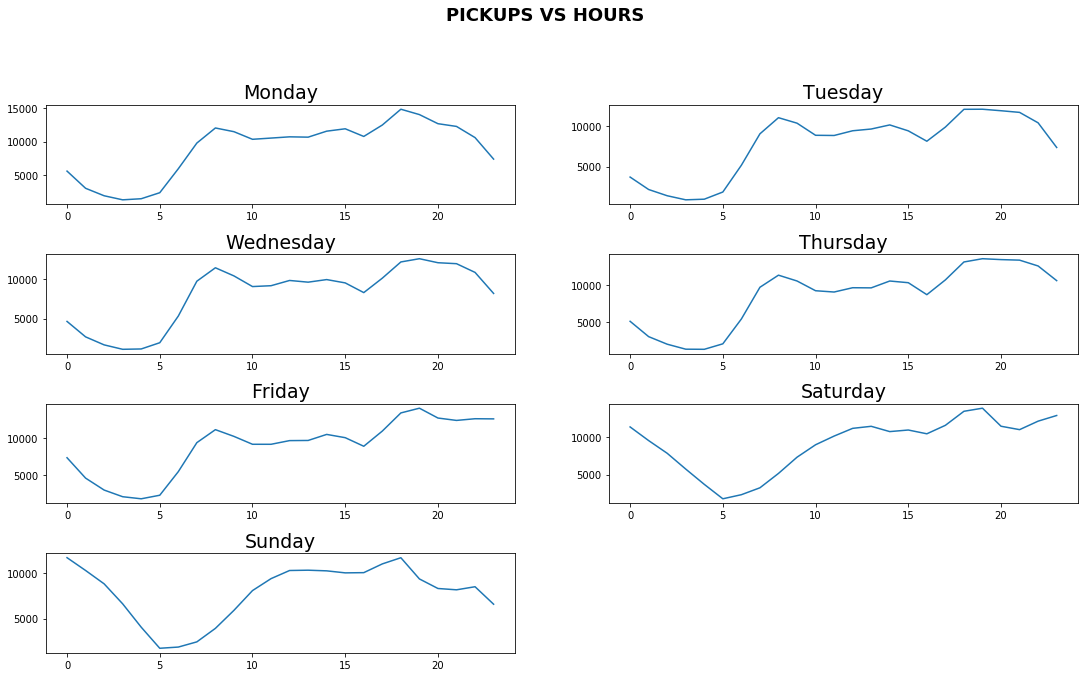

In [40]:
%matplotlib inline
fig = plt.figure()
fig.subplots_adjust(top=0.85)
fig.suptitle('PICKUPS VS HOURS', fontsize=18, fontweight='bold')
fig.set_size_inches(18.5, 10.5)
fig.subplots_adjust(hspace=.5)
# Monday
axis1 = fig.add_subplot(4,2,1)
axis1.set_title('Monday', fontsize=19)
monday = pickups_per_hour.loc[0:0,:].index.get_level_values('hour').tolist()
monday_1 = pickups_per_hour.loc[0:0,:]['dummy'].tolist()
axis1.plot(monday,monday_1)

#Tuesday 
axis2 = fig.add_subplot(4,2,2)
axis2.set_title('Tuesday', fontsize=19)
tuesday = pickups_per_hour.loc[1:1,:].index.get_level_values('hour').tolist()
tuesday_1 = pickups_per_hour.loc[1:1,:]['dummy'].tolist()
axis2.plot(tuesday,tuesday_1)

# Wednesday
axis3 = fig.add_subplot(4,2,3)
axis3.set_title('Wednesday', fontsize=19)
wednesday = pickups_per_hour.loc[2:2,:].index.get_level_values('hour').tolist()
wednesday_1 = pickups_per_hour.loc[2:2,:]['dummy'].tolist()
axis3.plot(wednesday,wednesday_1)

# Thursday
axis4 = fig.add_subplot(4,2,4)
axis4.set_title('Thursday', fontsize=19)
thursday = pickups_per_hour.loc[3:3,:].index.get_level_values('hour').tolist()
thursday_1 = pickups_per_hour.loc[3:3,:]['dummy'].tolist()
axis4.plot(thursday,thursday_1)

# Friday 
axis5 = fig.add_subplot(4,2,5)
axis5.set_title('Friday', fontsize=19)
friday =  pickups_per_hour.loc[4:4,:].index.get_level_values('hour').tolist()
friday_1 = pickups_per_hour.loc[4:4,:]['dummy'].tolist()
axis5.plot(friday,friday_1)

# Saturday
axis6 = fig.add_subplot(4,2,6)
axis6.set_title('Saturday', fontsize=19)
saturday = pickups_per_hour.loc[5:5,:].index.get_level_values('hour').tolist()
saturday_1 = pickups_per_hour.loc[5:5,:]['dummy'].tolist()
axis6.plot(saturday,saturday_1)

# Sunday
axis7 = fig.add_subplot(4,2,7)
axis7.set_title('Sunday', fontsize=19)
sunday = pickups_per_hour.loc[6:6,:].index.get_level_values('hour').tolist()
sunday_1 = pickups_per_hour.loc[6:6,:]['dummy'].tolist()
axis7.plot(sunday,sunday_1)

plt.show()

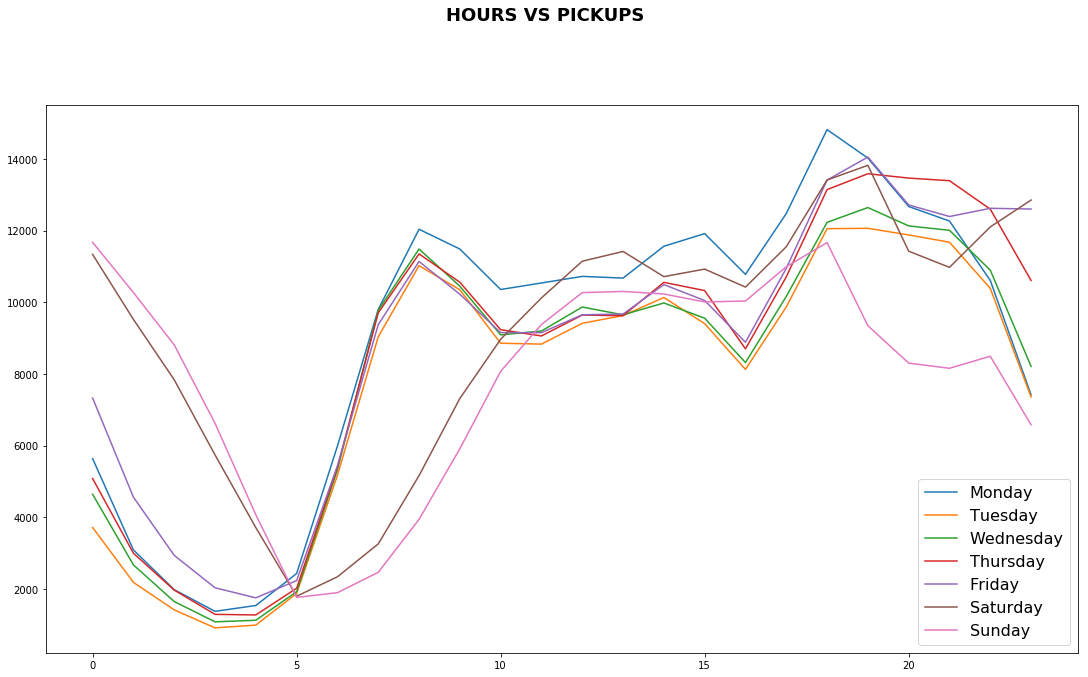

In [41]:
%matplotlib inline
fig = plt.figure()
fig.subplots_adjust(top=0.85)
fig.suptitle('HOURS VS PICKUPS', fontsize=18, fontweight='bold')
fig.set_size_inches(18.5, 10.5)
fig.subplots_adjust(hspace=.5)
axis1 = fig.add_subplot(1,1,1)
axis1.plot(monday,monday_1)
axis1.plot(tuesday,tuesday_1)
axis1.plot(wednesday,wednesday_1)
axis1.plot(thursday,thursday_1)
axis1.plot(friday,friday_1)
axis1.plot(saturday,saturday_1)
axis1.plot(sunday,sunday_1)
axis1.legend(['Monday','Tuesday','Wednesday','Thursday', 'Friday', 'Saturday', 'Sunday'], fontsize=16) # 
plt.show()

In [42]:
group_dataframe2 = data.loc[:, ['weekday','hour','fare_amount', 'tip_amount']]
groups2 = group_dataframe2.groupby(['weekday','hour'])

In [43]:
mean_fare_hour = groups2.mean()

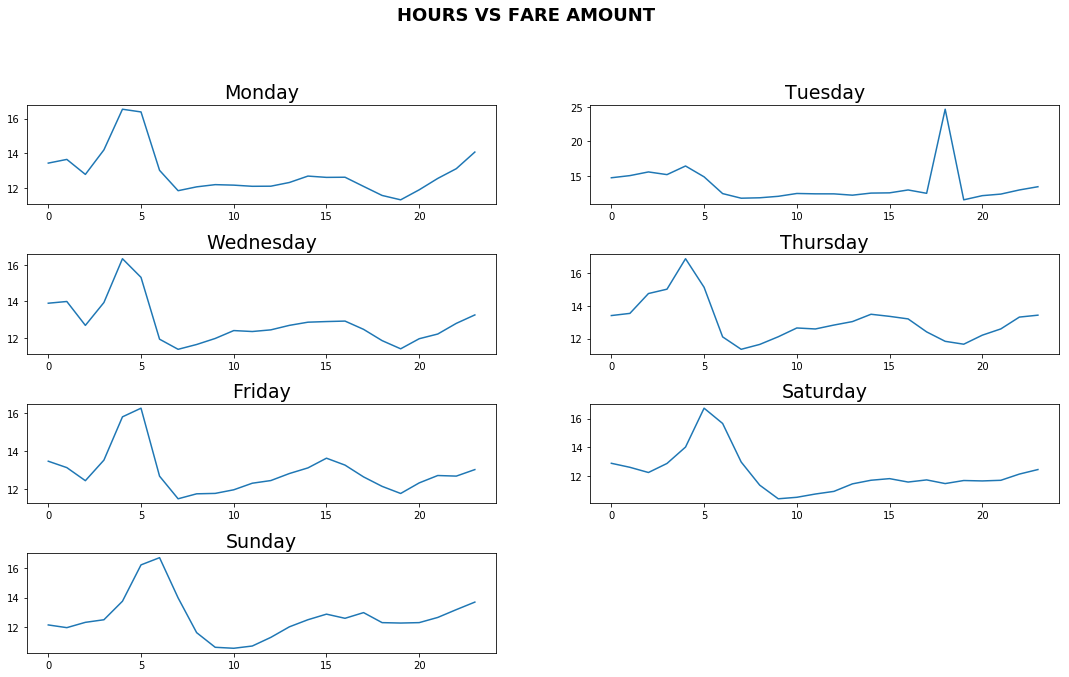

In [44]:
%matplotlib inline
fig = plt.figure()
fig.subplots_adjust(top=0.85)
fig.suptitle('HOURS VS FARE AMOUNT', fontsize=18, fontweight='bold')
fig.set_size_inches(18.5, 10.5)
fig.subplots_adjust(hspace=.5)
days = ['Monday','Tuesday','Wednesday','Thursday', 'Friday', 'Saturday', 'Sunday']

for i in range(0,7):
    axis1 = fig.add_subplot(4,2,i+1)
    axis1.set_title(days[i], fontsize=19)
    monday = mean_fare_hour.loc[i:i,:].index.get_level_values('hour').tolist()
    monday_1 = mean_fare_hour.loc[i:i,:]['fare_amount'].tolist()
    axis1.plot(monday,monday_1)

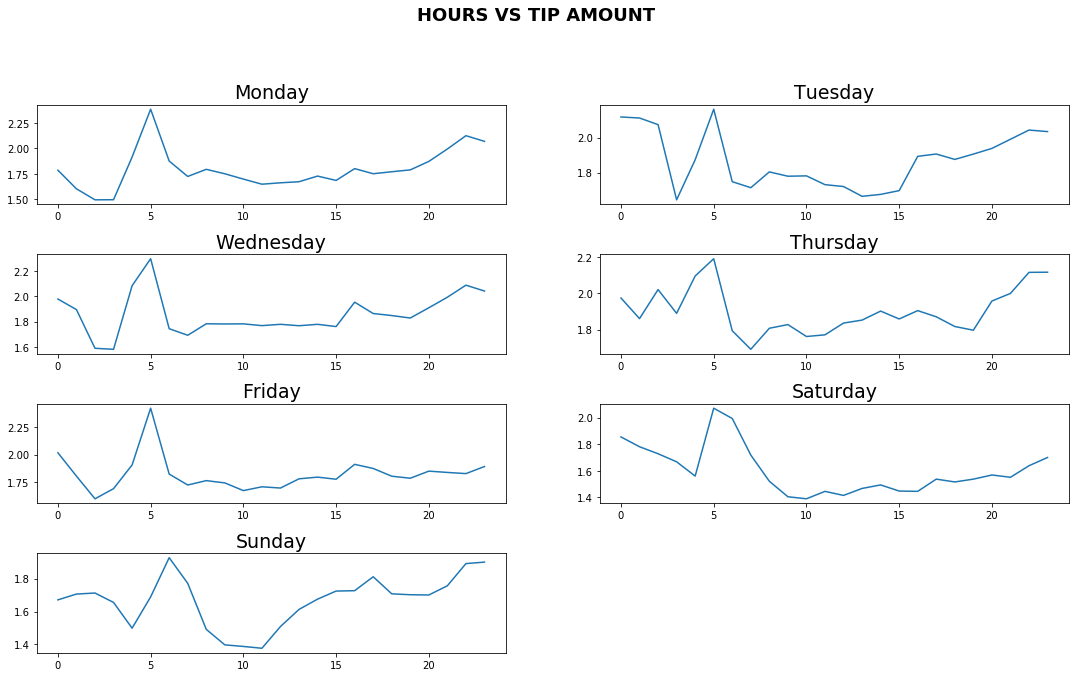

In [45]:
%matplotlib inline
fig = plt.figure()
fig.subplots_adjust(top=0.85)
fig.suptitle('HOURS VS TIP AMOUNT', fontsize=18, fontweight='bold')
fig.set_size_inches(18.5, 10.5)
fig.subplots_adjust(hspace=.5)
days = ['Monday','Tuesday','Wednesday','Thursday', 'Friday', 'Saturday', 'Sunday']

for i in range(0,7):
    axis1 = fig.add_subplot(4,2,i+1)
    axis1.set_title(days[i], fontsize=19)
    x = mean_fare_hour.loc[i:i,:].index.get_level_values('hour').tolist()
    y = mean_fare_hour.loc[i:i,:]['tip_amount'].tolist()
    axis1.plot(x,y)

In [46]:
group_dataframe3 = data.loc[:, ['weekday','hour','trip_distance']]
groups3 = group_dataframe3.groupby(['weekday','hour'])

In [47]:
trip_distances = groups3.mean()

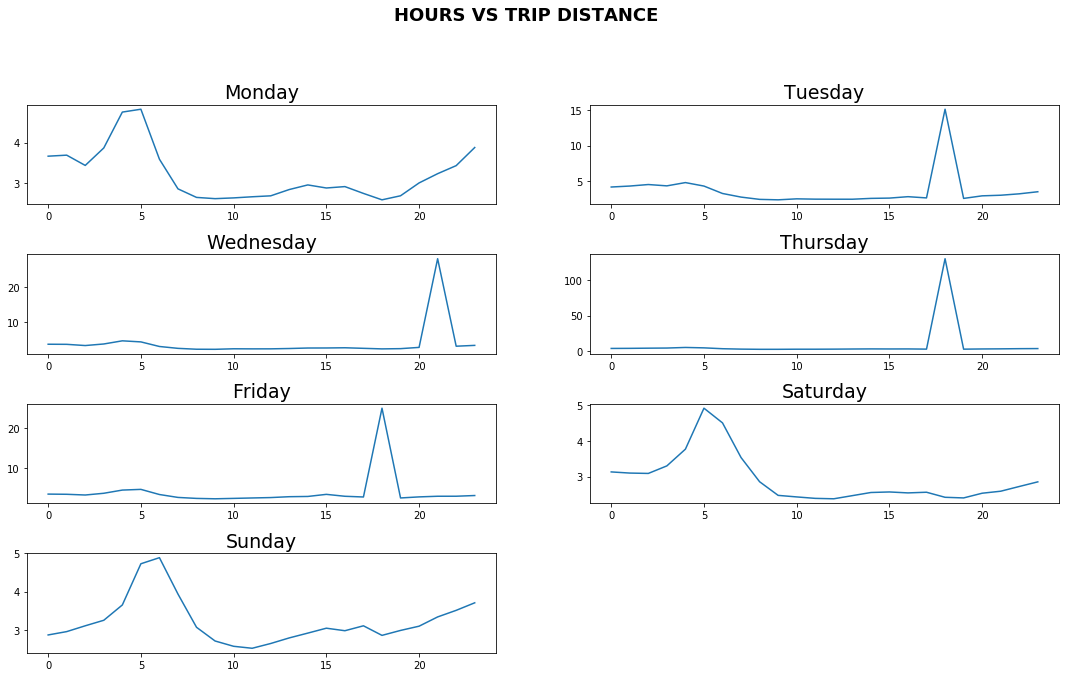

In [48]:
%matplotlib inline
fig = plt.figure()
fig.subplots_adjust(top=0.85)
fig.suptitle('HOURS VS TRIP DISTANCE', fontsize=18, fontweight='bold')
fig.set_size_inches(18.5, 10.5)
fig.subplots_adjust(hspace=.5)
days = ['Monday','Tuesday','Wednesday','Thursday', 'Friday', 'Saturday', 'Sunday']

for i in range(0,7):
    axis1 = fig.add_subplot(4,2,i+1)
    axis1.set_title(days[i], fontsize=19)
    x = trip_distances.loc[i:i,:].index.get_level_values('hour').tolist()
    y = trip_distances.loc[i:i,:]['trip_distance'].tolist()
    axis1.plot(x,y)

In [54]:
data.loc[(data['weekday']==1) & (data['hour']==18), ['hour','trip_distance']]

,hour,trip_distance
71617,18,4.60
71618,18,0.90
71619,18,1.24
71620,18,0.96
71621,18,14.40
71622,18,5.25
71623,18,1.30
71624,18,0.40
71625,18,0.50
71626,18,0.75
